## Time series EDA

* pandas data reader --- financial data 

* date time index

* time resampling

* time shifts

* mean rolling and expanding

* time series visualization

* one sample project on time series

In [3]:
# !pip install pandas-datareader
# remote data access

In [4]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [5]:
# показывает последние 5 лет
df_tesla = pdr.get_data_yahoo('TSLA')

In [6]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-03,886.440002,832.599976,878.770020,839.289978,20541200.0,839.289978
2022-03-04,855.650024,825.159973,849.099976,838.289978,22333200.0,838.289978
2022-03-07,866.140015,804.570007,856.299988,804.580017,24164700.0,804.580017
2022-03-08,849.989990,782.169983,795.530029,824.400024,26747400.0,824.400024
2022-03-09,860.559998,832.200012,839.479980,858.969971,19626652.0,858.969971


<AxesSubplot:xlabel='Date'>

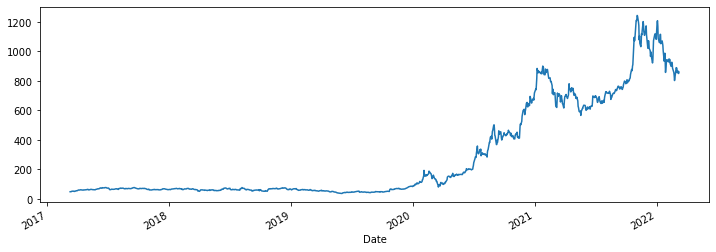

In [7]:
# plot the data 
df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

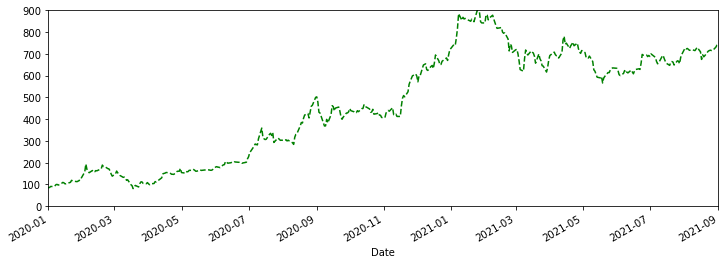

In [8]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],
                      ylim=(0, 900),
                      ls='--',
                      c='green',
                      figsize=(12,4))

In [9]:
df_tesla.index

DatetimeIndex(['2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15',
               '2017-03-16', '2017-03-17', '2017-03-20', '2017-03-21',
               '2017-03-22', '2017-03-23',
               ...
               '2022-02-24', '2022-02-25', '2022-02-28', '2022-03-01',
               '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-07',
               '2022-03-08', '2022-03-09'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [10]:
index = df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2021-01-01']['Open']

In [11]:
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2020-12-24    642.989990
2020-12-28    674.510010
2020-12-29    661.000000
2020-12-30    672.000000
2020-12-31    699.989990
Name: Open, Length: 253, dtype: float64

In [12]:
date = datetime(2021, 11, 21)

In [13]:
date

datetime.datetime(2021, 11, 21, 0, 0)

In [14]:
date.day

21

# Time Resampling

[datetime resampling tutorial](https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4)

<AxesSubplot:xlabel='Date'>

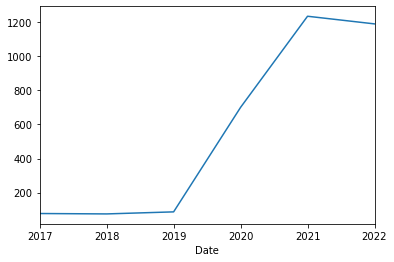

In [15]:
# rule = 'A' is year and frequency
df_tesla.resample(rule='A').max()['Open'].plot()

In [16]:
# quaterly
df_tesla.resample(rule='QS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,56.400002,55.442001,55.745998,55.660000,39938000.0,55.660000
2017-04-01,77.398003,75.870003,77.337997,76.690002,86307000.0,76.690002
2017-07-01,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-01,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-01,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-01,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998


In [17]:
# Business End Frequency
df_tesla.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-30,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


In [18]:
# Business End Frequency
df_tesla.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,56.400002,55.442001,55.745998,55.660000,39938000.0,55.660000
2017-04-03,77.398003,75.870003,77.337997,76.690002,86307000.0,76.690002
2017-07-03,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-02,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-02,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-02,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998


<AxesSubplot:xlabel='Date'>

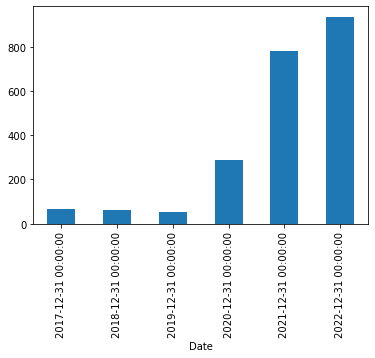

In [19]:
# plotting
df_tesla['Open'].resample(rule = 'A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

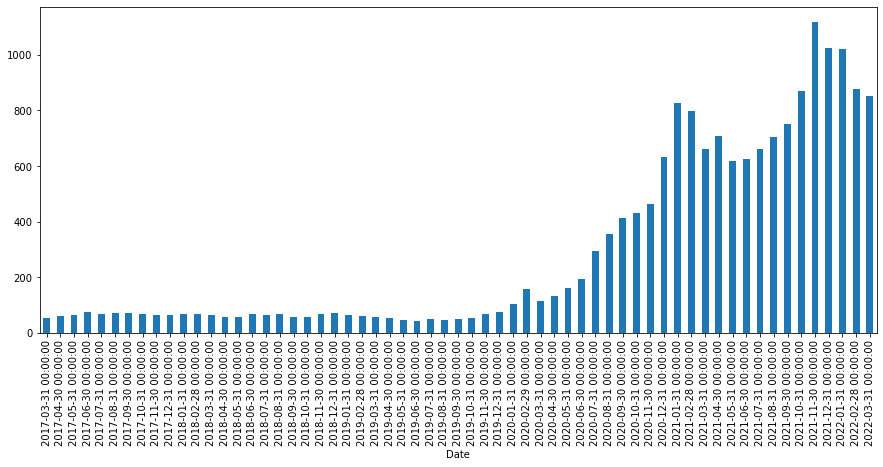

In [20]:
df_tesla['Open'].resample(rule = 'M').mean().plot(kind='bar', figsize=(15,6))

In [23]:
# rolling --- это mean average. Мы берем среднее за 10 дней (в данном случае)
df_tesla['High'].rolling(10).mean().head(20)

Date
2017-03-10        NaN
2017-03-13        NaN
2017-03-14        NaN
2017-03-15        NaN
2017-03-16        NaN
2017-03-17        NaN
2017-03-20        NaN
2017-03-21        NaN
2017-03-22        NaN
2017-03-23    51.7128
2017-03-24    52.0606
2017-03-27    52.5350
2017-03-28    52.9862
2017-03-29    53.3582
2017-03-30    53.6832
2017-03-31    53.9702
2017-04-03    54.6592
2017-04-04    55.4594
2017-04-05    56.4556
2017-04-06    57.3410
Name: High, dtype: float64

In [24]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()

In [25]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Open:30 days rolling
Date,,,,,,,
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999,NaN
2017-03-13,49.369999,48.556000,48.964001,49.234001,15113000.0,49.234001,NaN
2017-03-14,51.624001,49.203999,49.222000,51.599998,37992000.0,51.599998,NaN
2017-03-15,52.200001,50.854000,51.400002,51.146000,26654000.0,51.146000,NaN
2017-03-16,53.150002,51.812000,52.480000,52.410000,35661000.0,52.410000,NaN


<AxesSubplot:xlabel='Date'>

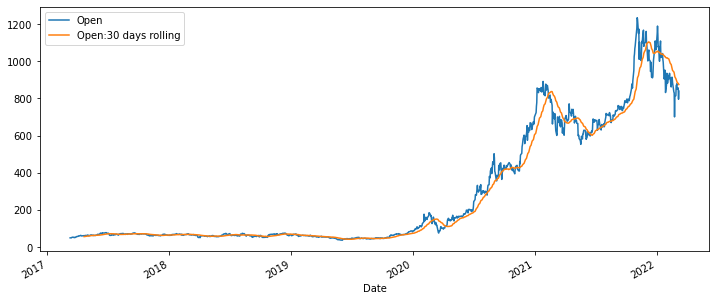

In [27]:
df_tesla[['Open', 'Open:30 days rolling']].plot(figsize=(12,5))

## Assignment

1. Read the Microsoft Data using Pandas data reader

2. Get the maximum price of the share from 2017-2022

3. Which is the date of the highest price of the stock? (why? read news)

4. Which is the date of the lowest price of the stock? (why? read news)

In [39]:
df_msft = pdr.get_data_yahoo('MSFT')

In [40]:
df_msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-10,65.260002,64.750000,65.110001,64.930000,19538200.0,60.611164
2017-03-13,65.190002,64.570000,65.010002,64.709999,20100000.0,60.405788
2017-03-14,64.550003,64.150002,64.529999,64.410004,14280200.0,60.125755
2017-03-15,64.919998,64.250000,64.550003,64.750000,24833800.0,60.443127
2017-03-16,64.760002,64.300003,64.750000,64.639999,20674300.0,60.340454


In [41]:
df_msft['High'].max()

349.6700134277344

In [45]:
df_msft[df_msft['High'] == df_msft['High'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-22,349.670013,339.549988,344.619995,339.829987,31031100.0,339.128754


In [46]:
df_msft[df_msft['Low'] == df_msft['Low'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-22,65.139999,64.120003,64.120003,65.029999,20680000.0,60.704514
